In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Autoregressive Conditional Heteroskedasticity (ARCH)
from arch import arch_model
from arch.univariate import ConstantMean, GARCH, Normal

import yfinance as yf

In [5]:
symbol = '^GSPC' # input
start = '2019-01-01' # input 
end = '2022-07-22'  # input
df = yf.download(symbol, start, end)
df = df.reset_index()

[*********************100%***********************]  1 of 1 completed


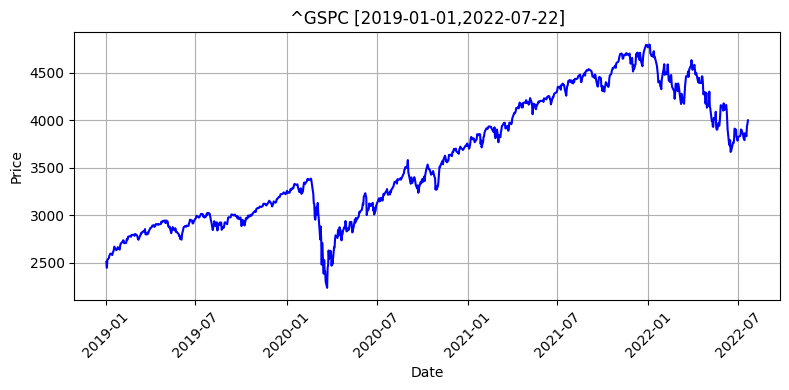

In [7]:
plt.figure(figsize=(8, 4))
plt.plot(df['Date'], df['Close'], linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(symbol+ f' [{start},{end}]')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
returns = df['Adj Close'].pct_change().dropna() * 100
am = arch_model(returns)

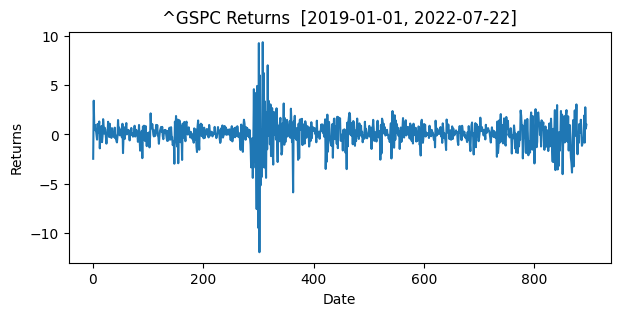

In [12]:
plt.figure(figsize = (7, 3))
plt.title(symbol + f' Returns  [{start}, {end}]')
returns.plot()
plt.ylabel('Returns')
plt.xlabel('Date')
plt.show()

In [13]:

am = ConstantMean(returns)
am.volatility = GARCH(1, 0, 1)
am.distribution = Normal()

In [14]:
res = am.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4969.040208987297
Iteration:      2,   Func. Count:     16,   Neg. LLF: 8481793754.471864
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1608.483928607097
Iteration:      4,   Func. Count:     29,   Neg. LLF: 1285.0689749556545
Iteration:      5,   Func. Count:     35,   Neg. LLF: 2153.1801044601043
Iteration:      6,   Func. Count:     41,   Neg. LLF: 1284.550780244488
Iteration:      7,   Func. Count:     47,   Neg. LLF: 1284.4799045782306
Iteration:      8,   Func. Count:     52,   Neg. LLF: 1284.4718944498766
Iteration:      9,   Func. Count:     57,   Neg. LLF: 1284.4718788123714
Iteration:     10,   Func. Count:     62,   Neg. LLF: 1284.47187674408
Iteration:     11,   Func. Count:     66,   Neg. LLF: 1284.4718767440002
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1284.47187674408
            Iterations: 11
            Function evaluations: 66
            Gradient evaluations

In [15]:
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1284.47
Distribution:                  Normal   AIC:                           2576.94
Method:            Maximum Likelihood   BIC:                           2596.13
                                        No. Observations:                  894
Date:                Thu, Aug 24 2023   Df Residuals:                      893
Time:                        01:54:23   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1086  2.705e-02      4.016  5.918e-05 [5.562e-0